In [1]:
import numpy as np
import pandas as pd
amir_deals = pd.read_csv("amir_deals.csv")

In [2]:
amir_deals

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17
...,...,...,...,...,...,...
173,174,Product A,Current,Lost,5835.32,23
174,175,Product D,Current,Won,6377.50,12
175,176,Product D,Current,Won,3537.61,28
176,177,Product A,Current,Won,6448.07,34


## Calculating Probabilities

Count the number of deals Amir worked on for each product type and store in counts.

In [3]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as probs.

In [4]:
# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


## Sampling Deals

* Set the random seed to 24.
* Take a sample of 5 deals without replacement and store them as sample_without_replacement.

In [5]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [6]:
# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


### Data Back-ups

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as min_time and his longest possible wait time as max_time. Remember that back-ups happen every 30 minutes.

In [7]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

In [8]:
# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5,0,30)
print(prob_less_than_5)

0.16666666666666666


In [9]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5,0,30)
print(prob_greater_than_5)

0.8333333333333334


In [11]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20,0,30) - uniform.cdf(10,0,30)
print(prob_between_10_and_20)

0.3333333333333333


### Simulating wait times

To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

In [12]:
import matplotlib.pyplot as plt

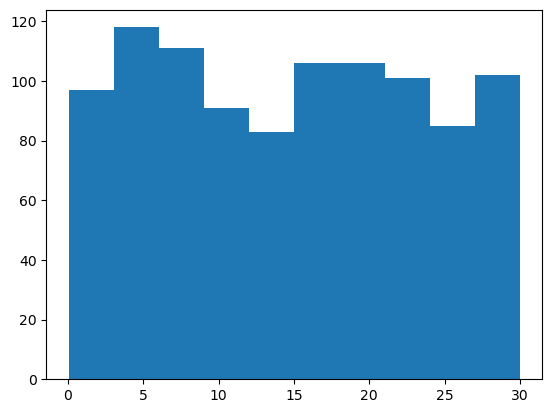

In [13]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

### Simlulating sales ideas

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

In [14]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.

In [15]:
# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

[1]


In [16]:
# Simulate 1 week of 3 deals
print(binom.rvs(3,0.3,size=1))

[0]


Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals.

In [17]:
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3,0.3,size = 52)

# Print mean deals won per week
print(np.mean(deals))

0.8461538461538461


## Calculating binomial probabilities

Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.

In [18]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3,3,0.3)

print(prob_3)

0.026999999999999996


In [19]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1,3,0.3)

print(prob_less_than_or_equal_1)

0.784


What's the probability that Amir closes more than 1 deal? Save this as prob_greater_than_1.

In [20]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1,3,0.3)

print(prob_greater_than_1)

0.21599999999999997


### How many sales will be won?

Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by n*p

Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.

In [21]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

0.8999999999999999


Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.

In [22]:
# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

0.75


Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

In [24]:
# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

1.0499999999999998
